In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import re

In [2]:
train_df=pd.read_csv('./toxic_train.csv')
test_df=pd.read_csv('./test.csv/toxic_test.csv')

In [3]:
train_df.sample(5)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
135931,d70fa1ca3020f49e,Oh boy. Edits(that people don't like) are cal...,0,0,0,0,0,0
102577,24fd00fecf8bb67b,"""\n\nErr, yeah, sometimes there's a bit of amb...",0,0,0,0,0,0
86046,e62f11531a848798,Is sex with dogs animal abuse? \n\nWhat about ...,1,0,0,0,0,0
103317,28efdd728aac2f03,No I did read what you have said several time ...,0,0,0,0,0,0
148538,4e619be84150c3b0,"""\nI was requested to come here as it was an R...",0,0,0,0,0,0


In [4]:
cols_target=['obscene','insult','toxic','severe_toxic','identity_hate','threat']

In [5]:
train_df.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
unlabelled_in_all=train_df[(train_df['toxic']!=1)&(train_df['severe_toxic']!=1)&(train_df['obscene']!=1)&
                          (train_df['threat']!=1)&(train_df['insult']!=1)&(train_df['identity_hate']!=1)]
print('Percentage of unlabelled comments is ',len(unlabelled_in_all)/len(train_df)*100)

Percentage of unlabelled comments is  89.83211235124176


In [7]:
no_comment=train_df[train_df['comment_text'].isnull()]
len(no_comment)

0

In [8]:
test_df.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [9]:
no_comment=test_df[test_df['comment_text'].isnull()]
no_comment

,id,comment_text


In [10]:
print('Total rows in test is {}'.format(len(test_df)))
print('Total rows in train is {}'.format(len(train_df)))
print(train_df[cols_target].sum())

Total rows in test is 153164
Total rows in train is 159571
obscene           8449
insult            7877
toxic            15294
severe_toxic      1595
identity_hate     1405
threat             478
dtype: int64


In [11]:
train_df['char_length']=train_df['comment_text'].apply(lambda x: len(str(x)))

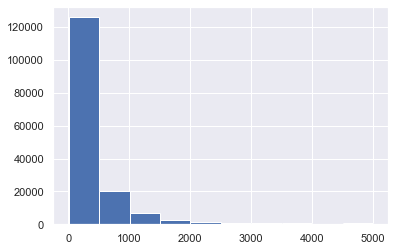

In [12]:
sns.set()
train_df['char_length'].hist()
plt.show()

In [13]:
data=train_df[cols_target]

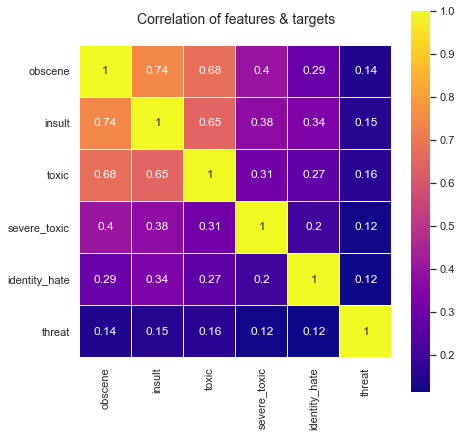

In [14]:
colormap=plt.cm.plasma
plt.figure(figsize=(7,7))
plt.title('Correlation of features & targets',y=1.05,size=14)
sns.heatmap(data.astype(float).corr(),linewidths=0.1,vmax=1.0,square=True,cmap=colormap,
           linecolor='white',annot=True)

In [15]:
test_df['char_length']=test_df['comment_text'].apply(lambda x: len(str(x)))

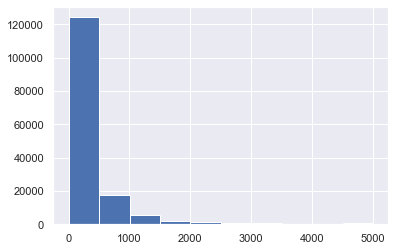

In [16]:
plt.figure()
plt.hist(test_df['char_length'])
plt.show()

In [17]:
def clean_text(text):
    text=text.lower()
    text=re.sub(r"what's", "what is ", text)
    text=re.sub(r"\'s", " ",text)
    text=re.sub(r"\'ve"," have ", text)
    text=re.sub(r"can't","cannot ", text)
    text=re.sub(r"n't"," not ", text)
    text=re.sub(r"i'm", "i am ", text)
    text=re.sub(r"\'re", " are ", text)
    text=re.sub(r"\'d"," would ", text)
    text=re.sub(r"\'ll", " will ",text)
    text=re.sub(r"\'scuse"," excuse ",text)
    text=re.sub('\W',' ',text)
    text=re.sub('\s+',' ',text)
    text=text.strip(' ')
    return text

In [18]:
train_df['comment_text']=train_df['comment_text'].map(lambda com : clean_text(com))

In [19]:
test_df['comment_text']=test_df['comment_text'].map(lambda com : clean_text(com))

In [20]:
train_df=train_df.drop('char_length',axis=1)

In [21]:
X=train_df.comment_text
test_X=test_df.comment_text

In [22]:
print(X.shape, test_X.shape)

(159571,) (153164,)


In [23]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vect=TfidfVectorizer(max_features=5000, stop_words='english')
vect

TfidfVectorizer(max_features=5000, stop_words='english')

In [24]:
X_dtm=vect.fit_transform(X)
X_dtm

<159571x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 3178715 stored elements in Compressed Sparse Row format>

In [25]:
test_X_dtm=vect.transform(test_X)
test_X_dtm

<153164x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 2618947 stored elements in Compressed Sparse Row format>

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
logreg=LogisticRegression(C=12.0)

submission_binary=pd.read_csv('../sample_submission.csv/toxic_sample_submission.csv')

for label in cols_target:
    print('... Processing {}'.format(label))
    y=train_df[label]
    logreg.fit(X_dtm,y)
    y_pred_X=logreg.predict(X_dtm)
    print('Training accuracy is {}'.format(accuracy_score(y,y_pred_X)))
    
    test_y_prob=logreg.predict_proba(test_X_dtm)[:,1]
    submission_binary[label]=test_y_prob

... Processing obscene


C:\Users\82103\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training accuracy is 0.9832363023356374
... Processing insult


C:\Users\82103\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training accuracy is 0.9755469352200588
... Processing toxic


C:\Users\82103\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training accuracy is 0.9639408163137412
... Processing severe_toxic


C:\Users\82103\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training accuracy is 0.9921100951927355
... Processing identity_hate


C:\Users\82103\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training accuracy is 0.9939713356436947
... Processing threat
Training accuracy is 0.9981199591404453


C:\Users\82103\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [27]:
submission_binary.head()

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,0.999959,0.460049,0.999967,0.050480,0.971455,0.436740
1,0000247867823ef7,0.002420,0.000433,0.000402,0.000325,0.003244,0.000409
2,00013b17ad220c46,0.011289,0.000115,0.003129,0.000035,0.007158,0.001216
3,00017563c3f7919a,0.001385,0.002118,0.000949,0.000117,0.000884,0.000034
4,00017695ad8997eb,0.019292,0.000793,0.001201,0.000600,0.003163,0.000568


In [28]:
submission_binary.to_csv('submission_binary.csv',index=False)

In [29]:
submission_chains=pd.read_csv('../sample_submission.csv/toxic_sample_submission.csv')

def add_feature(X,feature_to_add):
    from scipy.sparse import csr_matrix, hstack
    return hstack([X, csr_matrix(feature_to_add).T],'csr')

In [30]:
for label in cols_target:
    print('... Processing {}'.format(label))
    y=train_df[label]
    logreg.fit(X_dtm,y)
    y_pred_X=logreg.predict(X_dtm)
    print('Training Accuracy is {}'.format(accuracy_score(y, y_pred_X)))
    test_y=logreg.predict(test_X_dtm)
    test_y_prob=logreg.predict_proba(test_X_dtm)[:,1]
    submission_chains[label]=test_y_prob
    X_dtm = add_feature(X_dtm,y)
    print('Shape of X_dtm is now {}'.format(X_dtm.shape))
    test_X_dtm=add_feature(test_X_dtm,test_y)
    print('Shape of test_X_dtm is now {}'.format(test_X_dtm.shape))

... Processing obscene


C:\Users\82103\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Accuracy is 0.9832363023356374
Shape of X_dtm is now (159571, 5001)
Shape of test_X_dtm is now (153164, 5001)
... Processing insult


C:\Users\82103\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Accuracy is 0.9817510700565892
Shape of X_dtm is now (159571, 5002)
Shape of test_X_dtm is now (153164, 5002)
... Processing toxic


C:\Users\82103\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Accuracy is 0.9675818287784121
Shape of X_dtm is now (159571, 5003)
Shape of test_X_dtm is now (153164, 5003)
... Processing severe_toxic


C:\Users\82103\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Accuracy is 0.9929686471852655
Shape of X_dtm is now (159571, 5004)
Shape of test_X_dtm is now (153164, 5004)
... Processing identity_hate


C:\Users\82103\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Accuracy is 0.9955192359513947
Shape of X_dtm is now (159571, 5005)
Shape of test_X_dtm is now (153164, 5005)
... Processing threat


C:\Users\82103\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Accuracy is 0.9985649021438733
Shape of X_dtm is now (159571, 5006)
Shape of test_X_dtm is now (153164, 5006)


In [31]:
submission_chains.head()

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,0.999971,4.156529e-01,0.999967,0.191065,0.901263,0.593794
1,0000247867823ef7,0.002567,4.005855e-10,0.000402,0.000074,0.004005,0.000134
2,00013b17ad220c46,0.008637,1.124535e-10,0.003129,0.000009,0.004938,0.000515
3,00017563c3f7919a,0.001179,4.702385e-09,0.000949,0.000065,0.000601,0.000005
4,00017695ad8997eb,0.020541,6.238681e-10,0.001201,0.000162,0.001761,0.000107


In [32]:
submission_chains.to_csv('submission_chains.csv',index=False)

In [33]:
submission_combined=pd.read_csv('../sample_submission.csv/toxic_sample_submission.csv')

In [34]:
for label in cols_target:
    submission_combined[label]=0.5*(submission_chains[label]+submission_binary[label])

In [35]:
submission_combined.head()

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,0.999965,0.437851,0.999967,0.120772,0.936359,0.515267
1,0000247867823ef7,0.002493,0.000217,0.000402,0.000199,0.003624,0.000271
2,00013b17ad220c46,0.009963,0.000057,0.003129,0.000022,0.006048,0.000865
3,00017563c3f7919a,0.001282,0.001059,0.000949,0.000091,0.000742,0.000019
4,00017695ad8997eb,0.019916,0.000397,0.001201,0.000381,0.002462,0.000337


In [36]:
submission_combined.to_csv('submission_combined.csv',index=False)

# 발표

In [43]:
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, LSTM
from keras.layers import GlobalMaxPooling1D
from keras.models import Model
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.layers import Input
from keras.layers.merge import Concatenate

import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt

In [44]:
filter = train_df["comment_text"] != ""
train_df = train_df[filter]
train_df = train_df.dropna()

In [45]:
filter = test_df["comment_text"] != ""
test_df = test_df[filter]
test_df = test_df.dropna()

In [46]:
train_df_labels = train_df[["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]]
train_df_labels.head()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0


In [47]:
test_df.head()

,id,comment_text,char_length
0,00001cee341fdb12,yo bitch ja rule is more succesful then you wi...,367
1,0000247867823ef7,from rfc the title is fine as it is imo,50
2,00013b17ad220c46,sources zawe ashton on lapland,54
3,00017563c3f7919a,if you have a look back at the source the info...,205
4,00017695ad8997eb,i do not anonymously edit articles at all,41


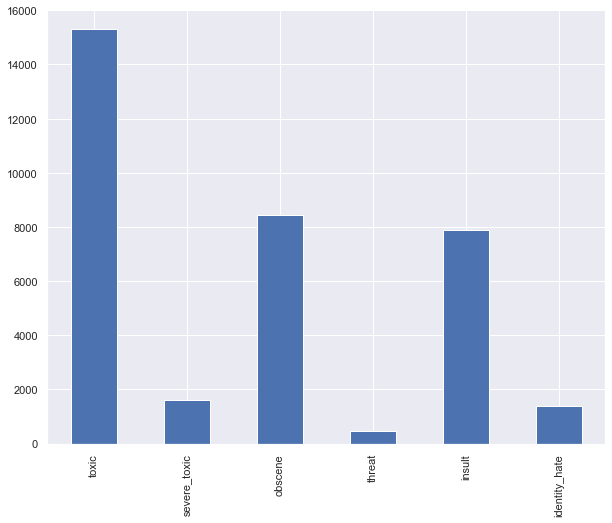

In [48]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

train_df_labels.sum(axis=0).plot.bar()

In [49]:
def preprocess_text(sen):
    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sen)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence

In [50]:
X = []
sentences = list(train_df["comment_text"])
for sen in sentences:
    X.append(preprocess_text(sen))

y = train_df_labels.values

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [52]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

vocab_size = len(tokenizer.word_index) + 1

maxlen = 200

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [53]:
from numpy import array
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()


embedding_matrix = zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [54]:
deep_inputs = Input(shape=(maxlen,))
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], trainable=False)(deep_inputs)
LSTM_Layer_1 = LSTM(128)(embedding_layer)
dense_layer_1 = Dense(6, activation='sigmoid')(LSTM_Layer_1)
model = Model(inputs=deep_inputs, outputs=dense_layer_1)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [55]:
print(model.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 200)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 200, 100)          14863300  
_________________________________________________________________
lstm (LSTM)                  (None, 128)               117248    
_________________________________________________________________
dense (Dense)                (None, 6)                 774       
Total params: 14,981,322
Trainable params: 118,022
Non-trainable params: 14,863,300
_________________________________________________________________
None


In [56]:
history = model.fit(X_train, y_train, batch_size=128, epochs=5, verbose=1, validation_split=0.2)

Epoch 1/5
798/798 [==============================] - 488s 577ms/step - loss: 0.1787 - acc: 0.9941 - val_loss: 0.1425 - val_acc: 0.9943
Epoch 2/5
798/798 [==============================] - 466s 584ms/step - loss: 0.1411 - acc: 0.9943 - val_loss: 0.1429 - val_acc: 0.9943
Epoch 3/5
798/798 [==============================] - 465s 583ms/step - loss: 0.1412 - acc: 0.9940 - val_loss: 0.1428 - val_acc: 0.9943
Epoch 4/5
798/798 [==============================] - 467s 586ms/step - loss: 0.1402 - acc: 0.9945 - val_loss: 0.1426 - val_acc: 0.9943
Epoch 5/5
798/798 [==============================] - 462s 579ms/step - loss: 0.1406 - acc: 0.9939 - val_loss: 0.1426 - val_acc: 0.9943


In [57]:
score = model.evaluate(X_test, y_test, verbose=1)

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

998/998 [==============================] - 73s 73ms/step - loss: 0.1420 - acc: 0.9941
Test Score: 0.14200429618358612
Test Accuracy: 0.9941093325614929


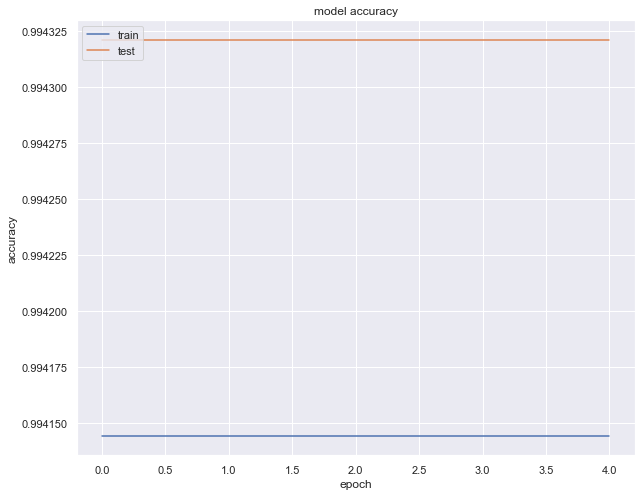

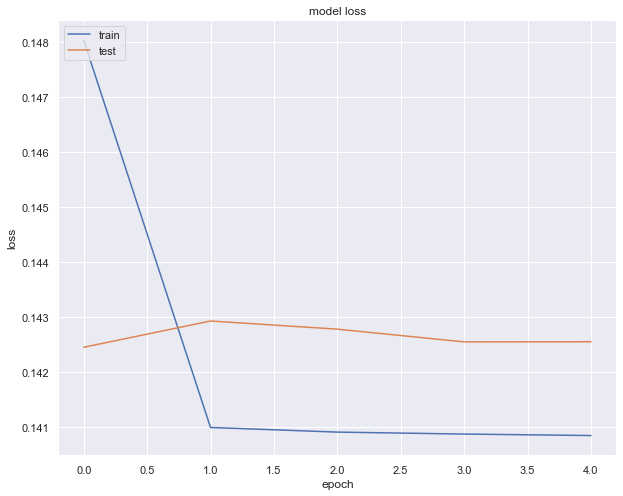

In [58]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [69]:
X = []
sentences = list(train_df["comment_text"])
for sen in sentences:
    X.append(preprocess_text(sen))

y = train_df[["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]]

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [71]:
# First output
y1_train = y_train[["toxic"]].values
y1_test =  y_test[["toxic"]].values

# Second output
y2_train = y_train[["severe_toxic"]].values
y2_test =  y_test[["severe_toxic"]].values

# Third output
y3_train = y_train[["obscene"]].values
y3_test =  y_test[["obscene"]].values

# Fourth output
y4_train = y_train[["threat"]].values
y4_test =  y_test[["threat"]].values

# Fifth output
y5_train = y_train[["insult"]].values
y5_test =  y_test[["insult"]].values

# Sixth output
y6_train = y_train[["identity_hate"]].values
y6_test =  y_test[["identity_hate"]].values

In [77]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

vocab_size = len(tokenizer.word_index) + 1

maxlen = 200

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [78]:
embedding_matrix = zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [79]:
input_1 = Input(shape=(maxlen,))
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], trainable=False)(input_1)
LSTM_Layer1 = LSTM(128)(embedding_layer)

output1 = Dense(1, activation='sigmoid')(LSTM_Layer1)
output2 = Dense(1, activation='sigmoid')(LSTM_Layer1)
output3 = Dense(1, activation='sigmoid')(LSTM_Layer1)
output4 = Dense(1, activation='sigmoid')(LSTM_Layer1)
output5 = Dense(1, activation='sigmoid')(LSTM_Layer1)
output6 = Dense(1, activation='sigmoid')(LSTM_Layer1)

model = Model(inputs=input_1, outputs=[output1, output2, output3, output4, output5, output6])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [80]:
print(model.summary())

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 200)]        0                                            
__________________________________________________________________________________________________
embedding_3 (Embedding)         (None, 200, 100)     14863300    input_4[0][0]                    
__________________________________________________________________________________________________
lstm_3 (LSTM)                   (None, 128)          117248      embedding_3[0][0]                
__________________________________________________________________________________________________
dense_13 (Dense)                (None, 1)            129         lstm_3[0][0]                     
____________________________________________________________________________________________

In [81]:
history = model.fit(x=X_train, y=[y1_train, y2_train, y3_train, y4_train, y5_train, y6_train], batch_size=8192, epochs=5, verbose=1, validation_split=0.2)

Epoch 1/5
13/13 [==============================] - 429s 33s/step - loss: 3.8446 - dense_13_loss: 0.6545 - dense_14_loss: 0.6426 - dense_15_loss: 0.6519 - dense_16_loss: 0.6265 - dense_17_loss: 0.6411 - dense_18_loss: 0.6280 - dense_13_acc: 0.9043 - dense_14_acc: 0.9902 - dense_15_acc: 0.9477 - dense_16_acc: 0.9969 - dense_17_acc: 0.9512 - dense_18_acc: 0.9913 - val_loss: 0.9176 - val_dense_13_loss: 0.3219 - val_dense_14_loss: 0.0856 - val_dense_15_loss: 0.2120 - val_dense_16_loss: 0.0346 - val_dense_17_loss: 0.2059 - val_dense_18_loss: 0.0576 - val_dense_13_acc: 0.9036 - val_dense_14_acc: 0.9901 - val_dense_15_acc: 0.9468 - val_dense_16_acc: 0.9967 - val_dense_17_acc: 0.9509 - val_dense_18_acc: 0.9902
Epoch 2/5
13/13 [==============================] - 421s 32s/step - loss: 0.8843 - dense_13_loss: 0.3197 - dense_14_loss: 0.0683 - dense_15_loss: 0.2080 - dense_16_loss: 0.0264 - dense_17_loss: 0.2123 - dense_18_loss: 0.0497 - dense_13_acc: 0.9050 - dense_14_acc: 0.9901 - dense_15_acc: 0.9

In [83]:
score = model.evaluate(x=X_test, y=[y1_test, y2_test, y3_test, y4_test, y5_test, y6_test], verbose=1)

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

998/998 [==============================] - 71s 71ms/step - loss: 0.8503 - dense_13_loss: 0.3157 - dense_14_loss: 0.0563 - dense_15_loss: 0.2094 - dense_16_loss: 0.0164 - dense_17_loss: 0.2002 - dense_18_loss: 0.0524 - dense_13_acc: 0.9042 - dense_14_acc: 0.9899 - dense_15_acc: 0.9463 - dense_16_acc: 0.9977 - dense_17_acc: 0.9494 - dense_18_acc: 0.9908
Test Score: 0.8503109812736511
Test Accuracy: 0.31569185853004456
